# 전처리

Tokenizer() : 토큰화와 정수 인코딩을 우해 사용. 

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()
train_text="The earth is an awesome place live"

#단어집합생성
tokenizer.fit_on_texts([train_text])

#정수 인코딩
sub_text="The earth is an great place live"
sequences=tokenizer.texts_to_sequences([sub_text])[0]

print('정수 인코딩 :',sequences)
print('단어 집합 :',tokenizer.word_index)

정수 인코딩 : [1, 2, 3, 4, 6, 7]
단어 집합 : {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


**pad_sequence()** :전체 훈련 데이터에서 각 샘플의 길이는 서로 다를 수 있다. 또는 각 문서또는 각 문장은 단어의 수가 제각각이다. 모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야할 때가 있다. 이를 자연어 처리에서는 패딩작업이라고 하는데 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰줍니다. 케라스에서는 pad_sequence()를 사용합니다. pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.

In [2]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

- 첫번째 인자 = 패딩을 진행할 데이터
- maxlen = 모든 데이터에 대해서 정규화 할 길이
- padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

# 2. 워드 임베딩(Word Embedding)

워드 임베딩이란 텍스트 내의 단어들을 **밀집 벡터(dense vector)**로 만드는 것을 말함. 앞서 배운 개념인 원-핫 벡터와 비교해보자, 원-핫 벡터는 대부분이 0의 값을 가지고 단 하나의 1의 값을 가지는 벡터이며 벡터의 차원이 대체적으로 크다는 성질을 가졌다. 
**원-핫벡터**는 단어 벡터 간의 유의미한 유사도를 구할 수 없다는 단점이 있다. 반면 워드 임베딩으로 부터 얻은 임베딩 벡터는 상대적으로 저차원을 갖며 모든 원소의 값이 실수이다. 

**Embedding()**은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴합니다.

Embedding()의 대표적인 인자는 다음과 같습니다.

- 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
- 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
- input_length = 입력 시퀀스의 길이



```
# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+

# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.
```




# 3. 모델링

- Sequential() 층을 구성하기 위한 것. Sequential()로 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가한다. 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(...)#층 추가
model.add(...)#층 추가
model.add(...)#층 추가


Embedding()을 통해 생성하는 임베딩 층을 추가하는 예시

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim,input_length))

전결합층(fully-connected layer)을 추가하는 예시

In [ ]:
model=Sequential()
model.add(Dense(1,input_dim=3,activation='relu'))

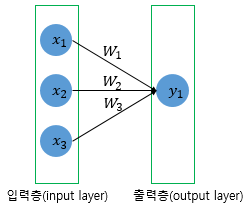

Dense()의 대표적인 인자

- 첫번쨰 인자 : 출력 뉴런의 수
- input_dim : 입력 뉴런의 수(입력의 차원)
- activation : 활성화 함수

- linear : 디폴트 값으로 별도 활성화함수 없이 입력 뉴런과 계산 결과 그대로 출력
- sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수
- softmax : 셋이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수. 
- relu : 은닉층에 주로 사용되는 활성화 함수. 

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

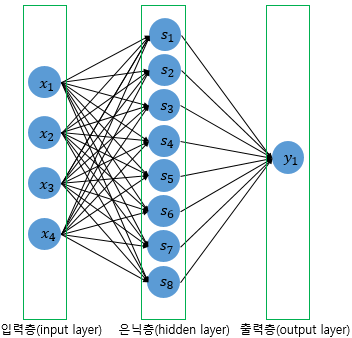

- summary() 모델의 정보를 요약해서 보여준다. 



```
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
=================================================================
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
```



# 컴파일과 훈련

- compile : 모델을 기계가 이해할 수 있도록 컴파일한다. 손실함수와 옵티마이저, 메트릭 함수를 선택한다. 

In [ ]:
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense
from tensorflow.keras.models import Sequential

vocab_size=10000
embedding_dim=32
hidden_units=32

model=Sequential()
model.add(Embedding(vocab_size,embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])


- optimizer = 훈련 과정을 설정하는 옵티마이저를 설정합니다.
- loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
- metrics = 훈련을 모니터링하기 위한 지표를 선택합니다.

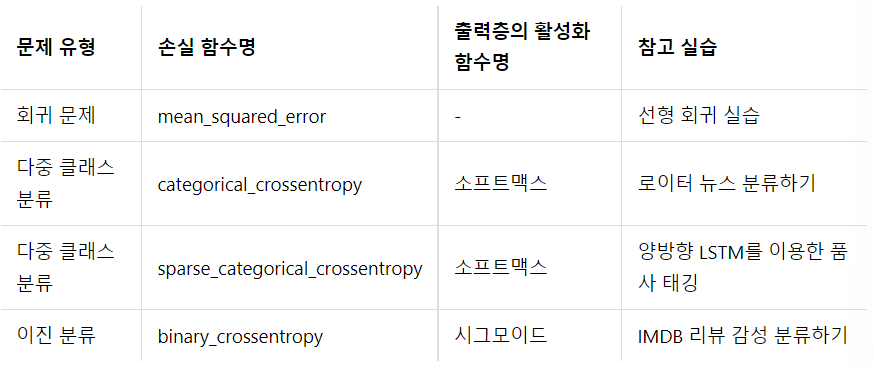

sparse_categorical_crossentropy는 categorical_crossentropy와 동일하게 다중 클래스 분류에서 사용하지만, 레이블을 원-핫 인코딩하지 않고 정수 인코딩 된 상태에서 수행 가능하다는 점이 다릅니다.

- fit() : 모델을 학습합니다. 모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting)이라고 하는데, 모델이 데이터에 적합해가는 과정이기 때문입니다. 그런 의미에서 fit()은 모델의 훈련을 시작합니다.

In [ ]:
# 위의 compile() 코드의 연장선상인 코드
model.fit(X_train, y_train, epochs=10, batch_size=32)

- 첫번째 인자 = 훈련 데이터에 해당됩니다.
- 두번째 인자 = 지도 학습에서 레이블 데이터에 해당됩니다.
- epochs = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의합니다.
- batch_size = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재합니다.

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

- validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용합니다. 일반적으로 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도나 오차를 함께 출력하는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증 데이터를 학습하지는 않습니다. 검증 데이터의 오차(loss)가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호입니다.

- validation_split = validation_data와 동일하게 검증 데이터를 사용하기 위한 용도로 validation_data 대신 사용할 수 있습니다. 검증 데이터를 지정하는 것이 아니라 훈련 데이터와 훈련 데이터의 레이블인 X_train과 y_train에서 일정 비율 분리하여 이를 검증 데이터로 사용합니다.

In [ ]:
# 훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))

verbose = 학습 중 출력되는 문구를 설정합니다.
- 0 : 아무 것도 출력하지 않습니다.
- 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
- 2 : 미니 배치마다 손실 정보를 출력합니다.

# 평가(Evaluation)과 예측(prediction)

- evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가

In [ ]:
model.evaluate(X_test,y_Test,batch_size=32)

- 첫번째 인자 = 테스트 데이터에 해당됩니다.
- 두번째 인자 = 지도 학습에서 레이블 테스트 - 데이터에 해당됩니다.
- batch_size = 배치 크기.

predict() : 임의의 입력에 대한 모델의 출력값을 확인합니다.

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
model.predict(X_input, batch_size=32)

- 첫번째 인자 = 예측하고자 하는 데이터.
- batch_size = 배치 크기.